The New Build Premium: A UK Housing Market Analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Exploratory Data Analysis

In [25]:
#Average Price of Houses

data = pd.read_csv('./Data/Average-price-seasonally-adjusted-2025-05.csv')


In [26]:
data.head(-5)

,Date,Region_Name,Area_Code,Average_Price_SA
0,1995-01-01,England,E92000001,50619
1,1995-01-01,Wales,W92000004,40567
2,1995-01-01,London,E12000007,79601
3,1995-01-01,East of England,E12000006,56587
4,1995-01-01,North West,E12000002,41392
...,...,...,...,...
5129,2025-05-01,Yorkshire and The Humber,E12000003,204849
5130,2025-05-01,East Midlands,E12000004,243202
5131,2025-05-01,West Midlands Region,E12000005,244999
5132,2025-05-01,East of England,E12000006,341018


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5139 entries, 0 to 5138
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5139 non-null   object
 1   Region_Name       5139 non-null   object
 2   Area_Code         5139 non-null   object
 3   Average_Price_SA  5139 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 160.7+ KB


In [28]:
#extract year from date

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year

In [29]:

data["Average_Price_SA"] = pd.to_numeric(data["Average_Price_SA"], errors="coerce")


data = data[(data["Year"] >= 2005) & (data["Year"] <= 2025)]


yearly_avg = (
    data.groupby("Year")["Average_Price_SA"]
         .mean()
         .reset_index(name="AvgPrice_UK")
)

print(yearly_avg)



    Year    AvgPrice_UK
0   2005  148803.177778
1   2006  159276.944444
2   2007  174058.044444
3   2008  167334.816667
4   2009  153165.611111
5   2010  162356.944444
6   2011  160320.194444
7   2012  161916.172222
8   2013  166486.661111
9   2014  180491.250000
10  2015  192366.577778
11  2016  206584.766667
12  2017  215623.905556
13  2018  221558.027778
14  2019  222910.822222
15  2020  229022.050000
16  2021  246089.455556
17  2022  268439.711111
18  2023  268864.722222
19  2024  270071.250000
20  2025  279031.013333


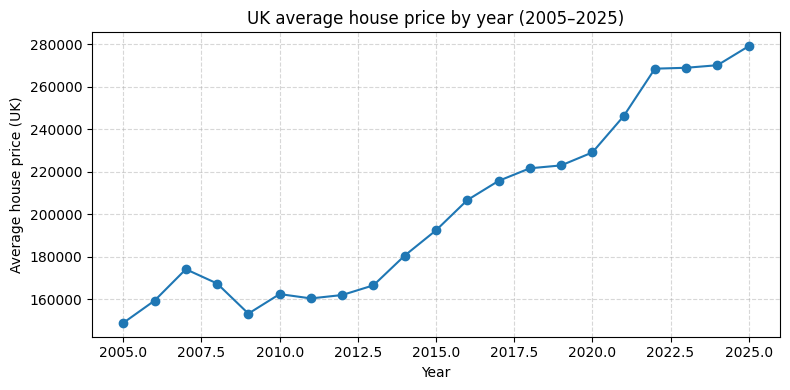

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(yearly_avg["Year"], yearly_avg["AvgPrice_UK"], marker="o")
plt.xlabel("Year")
plt.ylabel("Average house price (UK)")
plt.title("UK average house price by year (2005–2025)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [31]:
yearly_avg.head()

,Year,AvgPrice_UK
0,2005,148803.177778
1,2006,159276.944444
2,2007,174058.044444
3,2008,167334.816667
4,2009,153165.611111


    Year    AvgPrice_UK  Pct_Change
0   2005  148803.177778         NaN
1   2006  159276.944444    7.038671
2   2007  174058.044444    9.280125
3   2008  167334.816667   -3.862635
4   2009  153165.611111   -8.467578
5   2010  162356.944444    6.000912
6   2011  160320.194444   -1.254489
7   2012  161916.172222    0.995494
8   2013  166486.661111    2.822750
9   2014  180491.250000    8.411838
10  2015  192366.577778    6.579448
11  2016  206584.766667    7.391195
12  2017  215623.905556    4.375511
13  2018  221558.027778    2.752071
14  2019  222910.822222    0.610582
15  2020  229022.050000    2.741557
16  2021  246089.455556    7.452298
17  2022  268439.711111    9.082167
18  2023  268864.722222    0.158326
19  2024  270071.250000    0.448749
20  2025  279031.013333    3.317555


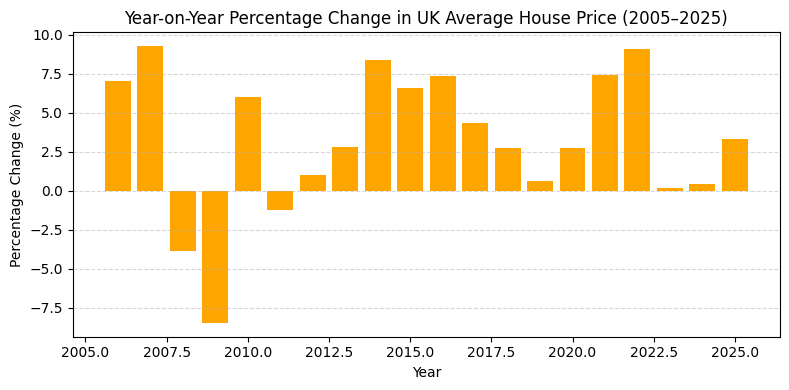

In [32]:
# % of change in average price year on year
yearly_avg["Pct_Change"] = yearly_avg["AvgPrice_UK"].pct_change() * 100
print(yearly_avg)

# Visualize percentage change
plt.figure(figsize=(8, 4))
plt.bar(yearly_avg["Year"], yearly_avg["Pct_Change"], color="orange")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.title("Year-on-Year Percentage Change in UK Average House Price (2005–2025)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [33]:
# data.to_csv('test.csv')

In [34]:
# Housing price of Scotland
scotland_data = data[data["Region_Name"] == "Scotland"]
scotland_yearly_avg = (
    scotland_data.groupby("Year")["Average_Price_SA"]
                  .mean()
                  .reset_index(name="AvgPrice_Scotland")
)
print(scotland_yearly_avg)

    Year  AvgPrice_Scotland
0   2005      100140.500000
1   2006      114110.583333
2   2007      130875.833333
3   2008      130488.333333
4   2009      124044.750000
5   2010      125974.666667
6   2011      123677.500000
7   2012      119624.333333
8   2013      120105.333333
9   2014      125746.916667
10  2015      130734.833333
11  2016      132401.916667
12  2017      136546.000000
13  2018      142566.833333
14  2019      145130.583333
15  2020      149171.416667
16  2021      163890.166667
17  2022      176835.666667
18  2023      177011.833333
19  2024      181381.666667
20  2025      189496.400000


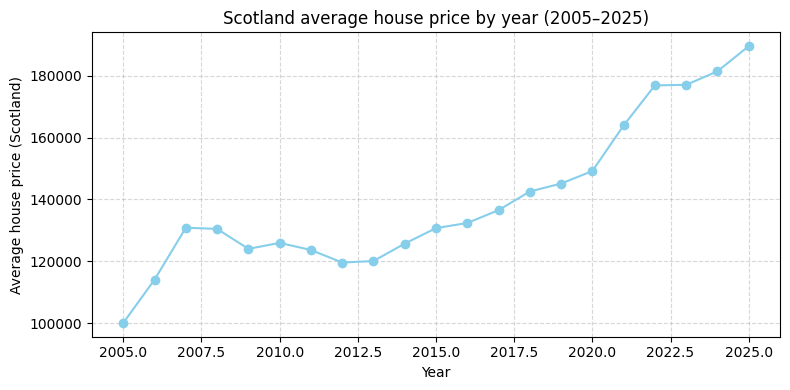

In [35]:
#visualize Scotland average price
plt.figure(figsize=(8, 4))
plt.plot(scotland_yearly_avg["Year"], scotland_yearly_avg["AvgPrice_Scotland"], marker="o", color="skyblue")
plt.xlabel("Year")
plt.ylabel("Average house price (Scotland)")
plt.title("Scotland average house price by year (2005–2025)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

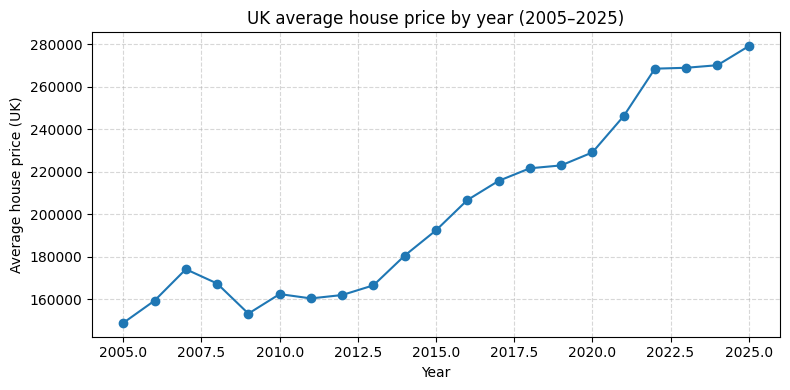

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(yearly_avg["Year"], yearly_avg["AvgPrice_UK"], marker="o")
plt.xlabel("Year")
plt.ylabel("Average house price (UK)")
plt.title("UK average house price by year (2005–2025)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

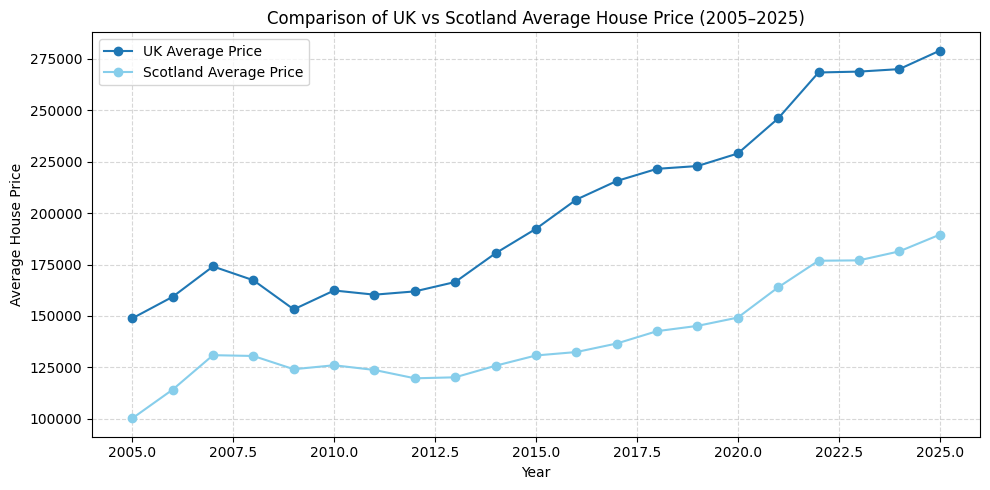

In [37]:
#Compare Scotland vs UK average price
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg["Year"], yearly_avg["AvgPrice_UK"], marker="o", label="UK Average Price")
plt.plot(scotland_yearly_avg["Year"], scotland_yearly_avg["AvgPrice_Scotland"], marker="o", label="Scotland Average Price", color="skyblue")
plt.xlabel("Year")
plt.ylabel("Average House Price")
plt.title("Comparison of UK vs Scotland Average House Price (2005–2025)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

In [38]:
# Average price of London
london_data = data[data["Region_Name"] == "London"]
london_yearly_avg = (
    london_data.groupby("Year")["Average_Price_SA"]
                .mean()
                .reset_index(name="AvgPrice_London")
)
print(london_yearly_avg)

    Year  AvgPrice_London
0   2005    251802.250000
1   2006    268868.333333
2   2007    307209.000000
3   2008    302751.083333
4   2009    275874.166667
5   2010    304413.500000
6   2011    310831.416667
7   2012    325146.416667
8   2013    352167.750000
9   2014    413799.750000
10  2015    455619.583333
11  2016    501572.750000
12  2017    514683.500000
13  2018    512844.250000
14  2019    505778.083333
15  2020    518680.500000
16  2021    535156.166667
17  2022    566071.833333
18  2023    558606.250000
19  2024    557590.833333
20  2025    569317.800000


C:\Users\niran\AppData\Local\Temp\ipykernel_23424\3670176573.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'London average house price by year (2005–2025)')

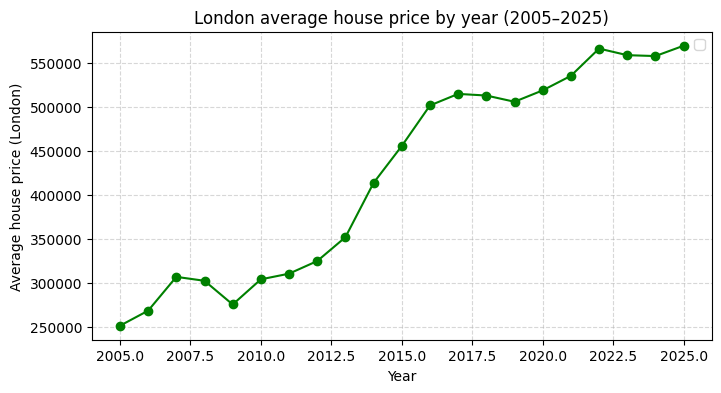

In [39]:
# Visualize London average price
plt.figure(figsize=(8, 4))

plt.plot(london_yearly_avg["Year"], london_yearly_avg["AvgPrice_London"], marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("Average house price (London)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.title("London average house price by year (2005–2025)")

Text(0, 0.5, 'Average House Price')

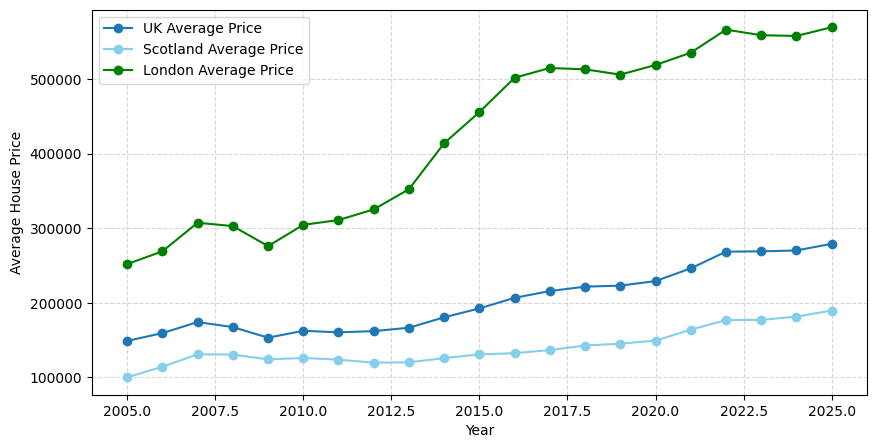

In [40]:
#Compare Scotland and London and UK average prices
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg["Year"], yearly_avg["AvgPrice_UK"], marker="o", label="UK Average Price")
plt.plot(scotland_yearly_avg["Year"], scotland_yearly_avg["AvgPrice_Scotland"], marker="o", label="Scotland Average Price", color="skyblue")
plt.plot(london_yearly_avg["Year"], london_yearly_avg["AvgPrice_London"], marker="o", label="London Average Price", color="green")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.xlabel("Year")
plt.ylabel("Average House Price")

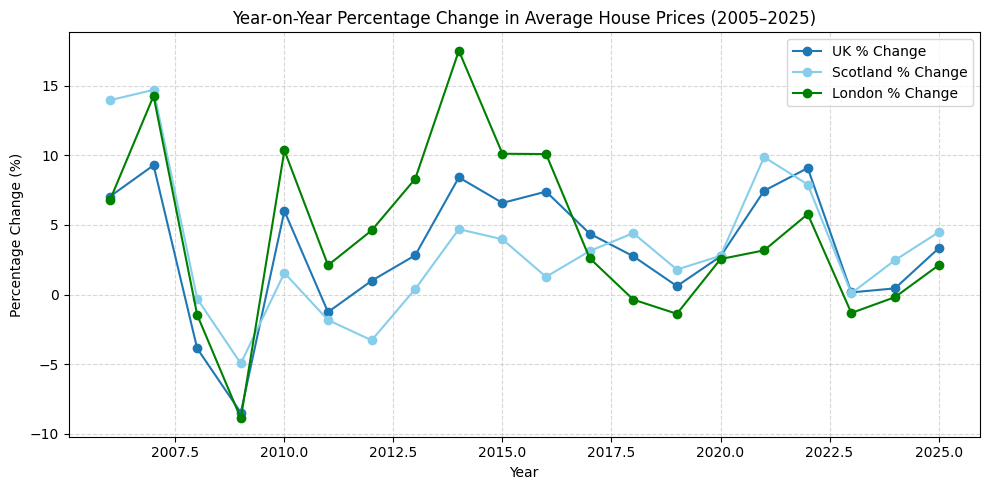

In [41]:
# visualize year on year percentage change for Scotland and London and UK average prices
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg["Year"], yearly_avg["Pct_Change"], marker="o", label="UK % Change")
plt.plot(scotland_yearly_avg["Year"], scotland_yearly_avg["AvgPrice_Scotland"].pct_change() * 100, marker="o", label="Scotland % Change", color="skyblue")
plt.plot(london_yearly_avg["Year"], london_yearly_avg["AvgPrice_London"].pct_change() * 100, marker="o", label="London % Change", color="green")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.title("Year-on-Year Percentage Change in Average House Prices (2005–2025)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

In [42]:
#average price change from 2005 to 2025
price_2005 = yearly_avg[yearly_avg["Year"] == 2005]["AvgPrice_UK"].values[0]
price_2025 = yearly_avg[yearly_avg["Year"] == 2025]["AvgPrice_UK"].values[0]
price_change = price_2025 - price_2005
print(f"Average price change from 2005 to 2025: £{price_change:,.2f}")
percent_change = (price_change / price_2005) * 100
print(f"Percentage change from 2005 to 2025: {percent_change:.2f}%")



Average price change from 2005 to 2025: £130,227.84
Percentage change from 2005 to 2025: 87.52%


In [43]:
# UK inflation rate data
inflation_data = pd.read_csv('./Data/uk_inflation.csv')

In [44]:
inflation_data.head()

,Year,Inflation_Consumer_Prices_Annual_Percent
0,2005,2.291667
1,2006,1.451120
2,2007,0.368047
3,2008,1.008417
4,2009,2.557756


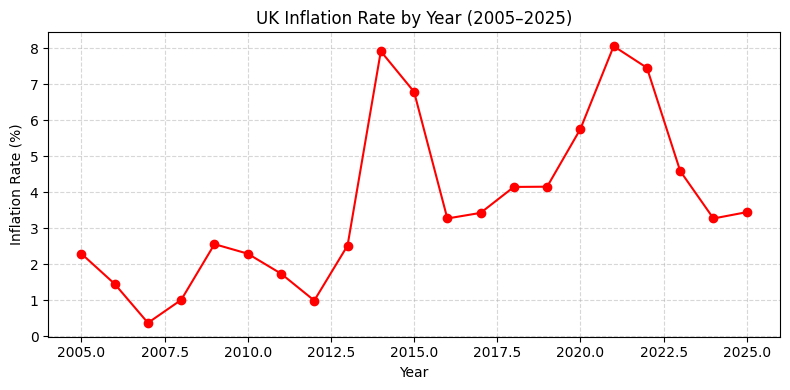

In [45]:
# inflation rate visualization
plt.figure(figsize=(8, 4))
plt.plot(inflation_data["Year"], inflation_data["Inflation_Consumer_Prices_Annual_Percent"], marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.title("UK Inflation Rate by Year (2005–2025)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


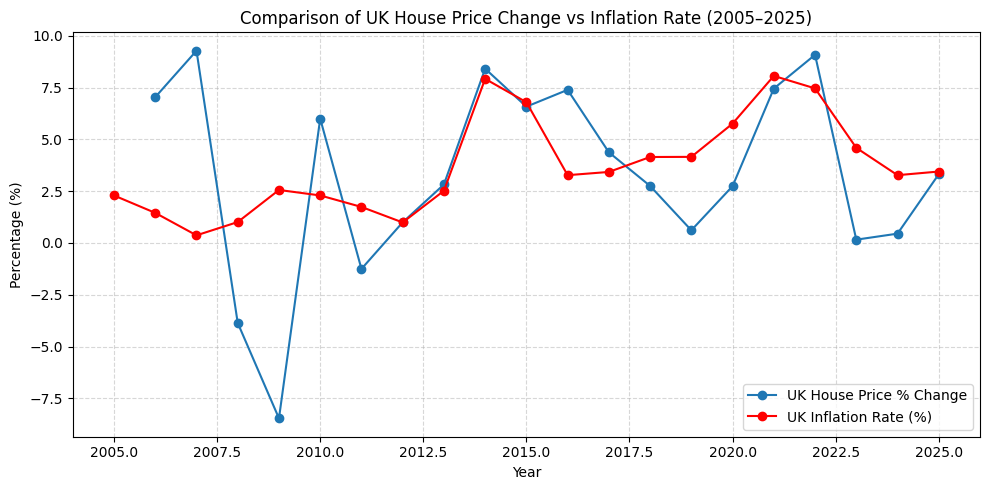

In [46]:
# uk inflation and housing price change comparison 
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg["Year"], yearly_avg["Pct_Change"], marker="o", label="UK House Price % Change")
plt.plot(inflation_data["Year"], inflation_data["Inflation_Consumer_Prices_Annual_Percent"], marker="o", label="UK Inflation Rate (%)", color="red")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Comparison of UK House Price Change vs Inflation Rate (2005–2025)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

In [47]:
#Compare average house price increase to inflation rate
merged_data = pd.merge(yearly_avg, inflation_data, on="Year", how="inner")
print(merged_data)


    Year    AvgPrice_UK  Pct_Change  Inflation_Consumer_Prices_Annual_Percent
0   2005  148803.177778         NaN                                  2.291667
1   2006  159276.944444    7.038671                                  1.451120
2   2007  174058.044444    9.280125                                  0.368047
3   2008  167334.816667   -3.862635                                  1.008417
4   2009  153165.611111   -8.467578                                  2.557756
5   2010  162356.944444    6.000912                                  2.292840
6   2011  160320.194444   -1.254489                                  1.738105
7   2012  161916.172222    0.995494                                  0.989487
8   2013  166486.661111    2.822750                                  2.518371
9   2014  180491.250000    8.411838                                  7.922049
10  2015  192366.577778    6.579448                                  6.793967
11  2016  206584.766667    7.391195                             

In [52]:
# Wales and Northern Ireland average price analysis
wales_data = data[data["Region_Name"] == "Wales"]
wales_yearly_avg = (
    wales_data.groupby("Year")["Average_Price_SA"]
                .mean()
                .reset_index(name="AvgPrice_Wales")
)
print(wales_yearly_avg)

    Year  AvgPrice_Wales
0   2005   119686.083333
1   2006   128610.416667
2   2007   137155.333333
3   2008   130071.833333
4   2009   119724.333333
5   2010   122854.166667
6   2011   120454.583333
7   2012   119972.416667
8   2013   120450.750000
9   2014   126702.916667
10  2015   129401.250000
11  2016   135355.166667
12  2017   141380.916667
13  2018   147715.666667
14  2019   153450.083333
15  2020   158982.166667
16  2021   177237.500000
17  2022   198243.666667
18  2023   199460.583333
19  2024   201661.750000
20  2025   208232.200000


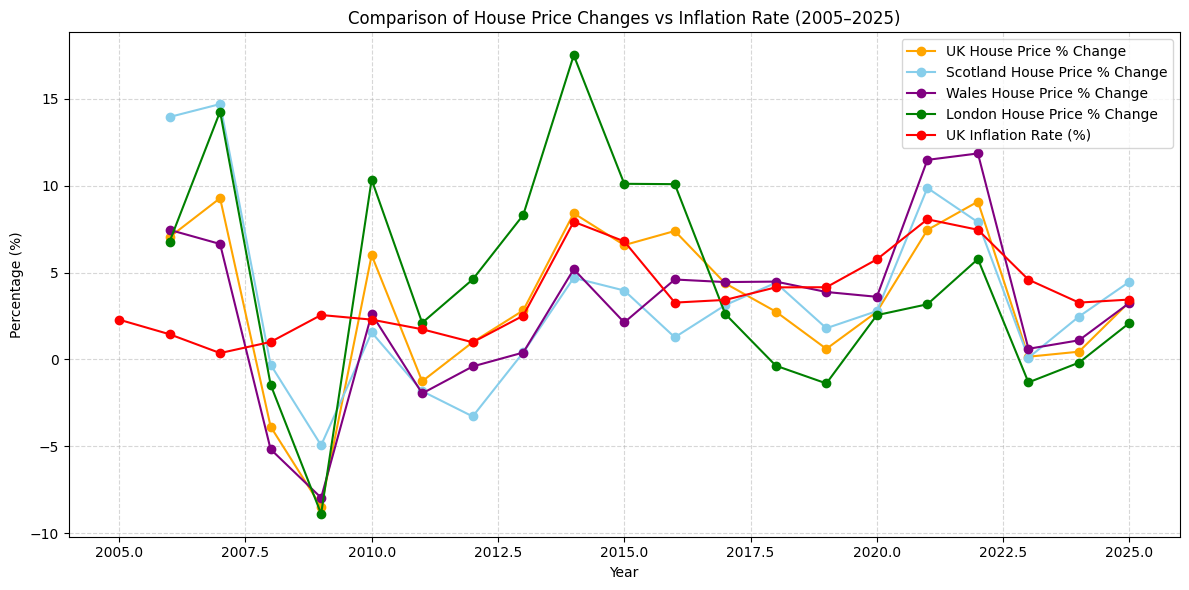

In [53]:
#Comparison of England , Scotland, Wales,  UK , London house price changes vs inflation rate visualization
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg["Year"], yearly_avg["Pct_Change"], marker="o", label="UK House Price % Change", color="orange")
plt.plot(scotland_yearly_avg["Year"], scotland_yearly_avg["AvgPrice_Scotland"].pct_change() * 100, marker="o", label="Scotland House Price % Change", color="skyblue")
plt.plot(wales_yearly_avg["Year"], wales_yearly_avg["AvgPrice_Wales"].pct_change() * 100, marker="o", label="Wales House Price % Change", color="purple")
plt.plot(london_yearly_avg["Year"], london_yearly_avg["AvgPrice_London"].pct_change() * 100, marker="o", label="London House Price % Change", color="green")
plt.plot(inflation_data["Year"], inflation_data["Inflation_Consumer_Prices_Annual_Percent"], marker="o", label="UK Inflation Rate (%)", color="red")

plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Comparison of House Price Changes vs Inflation Rate (2005–2025)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()